In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
train_data['DESCRIPTION'].fillna("", inplace=True)
train_data.sample(8)

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_20608\389868291.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
25096,25097,Stonewall (2015),drama,The plot revolves around the 1969 Stonewall R...
50061,50062,The Legacy: The Passion of the Christ (2007),documentary,Divided into Five segments: Through the Ages ...
18755,18756,"""Stone in the River"" (2015)",thriller,A tourist boat with over 100 people onboard d...
40110,40111,"""Am laufenden Band"" (1974)",game-show,Four pairs of family members of different gen...
16083,16084,Cut (2011/I),drama,Shuji is an uncompromising young filmmaker at...
36075,36076,"""Zhivoy Pushkin"" (1999)",biography,"Parfenov's documentary, shot for Alexander Pu..."
10948,10949,Ek Saudagar (1985),drama,Kishore is a dedicated union worker for sever...
17405,17406,Saps at Sea (1940),comedy,"After working in the noisy horn factory, just..."


In [3]:
test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data['DESCRIPTION'].fillna("", inplace=True)
test_data.sample(8)

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_20608\1159519697.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
23717,23718,The Darkest Dawn (2016),The movie that tells the story of two teenage...,
8836,8837,"""Shrimaan Shrimati"" (1994)","The series is based on the premise of ""love t...",
44752,44753,Hai xia liang an (1988),"Mr. Sun is a married man. 40 years ago, he es...",
22826,22827,Barry (1949),"Sylvain and Angelina, two young people living...",
507,508,Don't Look at Me (I'm Ugly in the Morning) (2...,"""Don't Look At Me (I'm Ugly In The Morning)"" ...",
42181,42182,Double jeu (1998),Rosa is mad at Ben. They were supposed to spe...,
28510,28511,Mississippi Juco the Toughest Football League...,This documentary profiles a little-known foot...,
18573,18574,Bole India Jai Bhim (2016),Babu Hardas was a Dalit leader and an ardent ...,


In [4]:
test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_solution_data.sample(8)

C:\Users\Prakriti\AppData\Local\Temp\ipykernel_20608\1067535593.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
12713,12714,"""Miserably Single"" (2011)",comedy,"The friendship of five, single, yet successfu..."
5727,5728,How They Make Adult Movies (1997),documentary,Behind the scenes look at how hardcore sex vi...
53808,53809,The Dancer's Peril (1917),romance,The Grand Duke Alexis has been happy with his...
29203,29204,Hustlers (2014),drama,A street smart clubowner is frustrated with t...
5204,5205,American Interior (2014),documentary,"In 1792, John Evans, a farmhand from Snowdoni..."
50799,50800,"""Movie Trivia Schmoedown"" (2014)",game-show,Movie Trivia Schmoedown is your weekly UFC st...
53279,53280,Living Idle (2017),short,Living Idle is a symbolic short film that ref...
27604,27605,Equal Standard (????),drama,An off-duty New York City Police Detective ge...


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
train_data.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


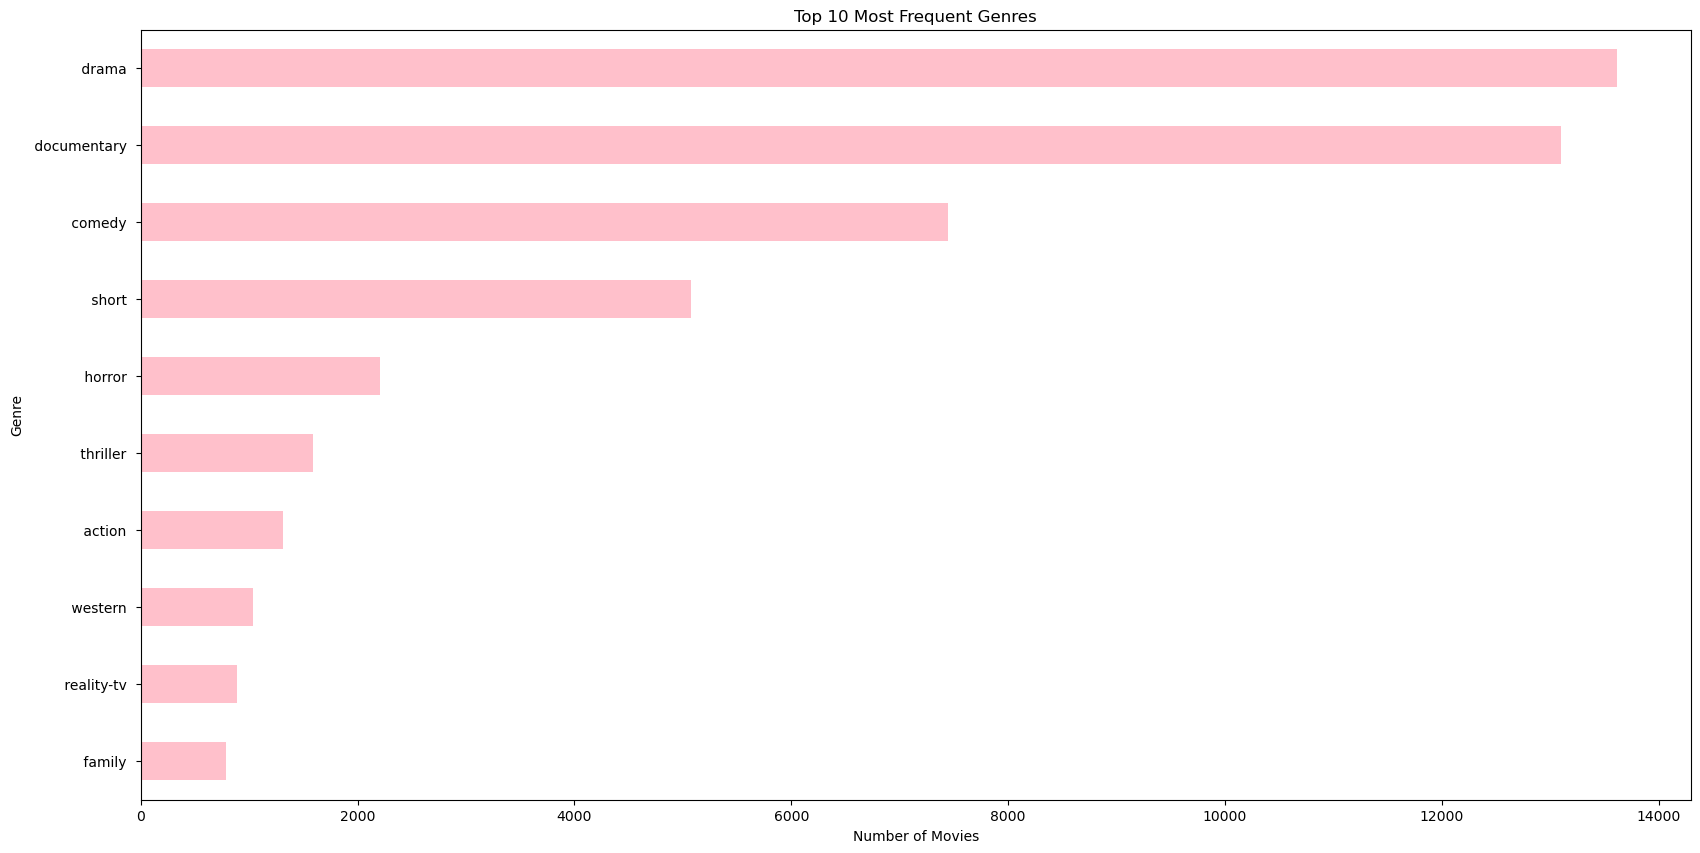

In [7]:
top_genres = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='pink')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

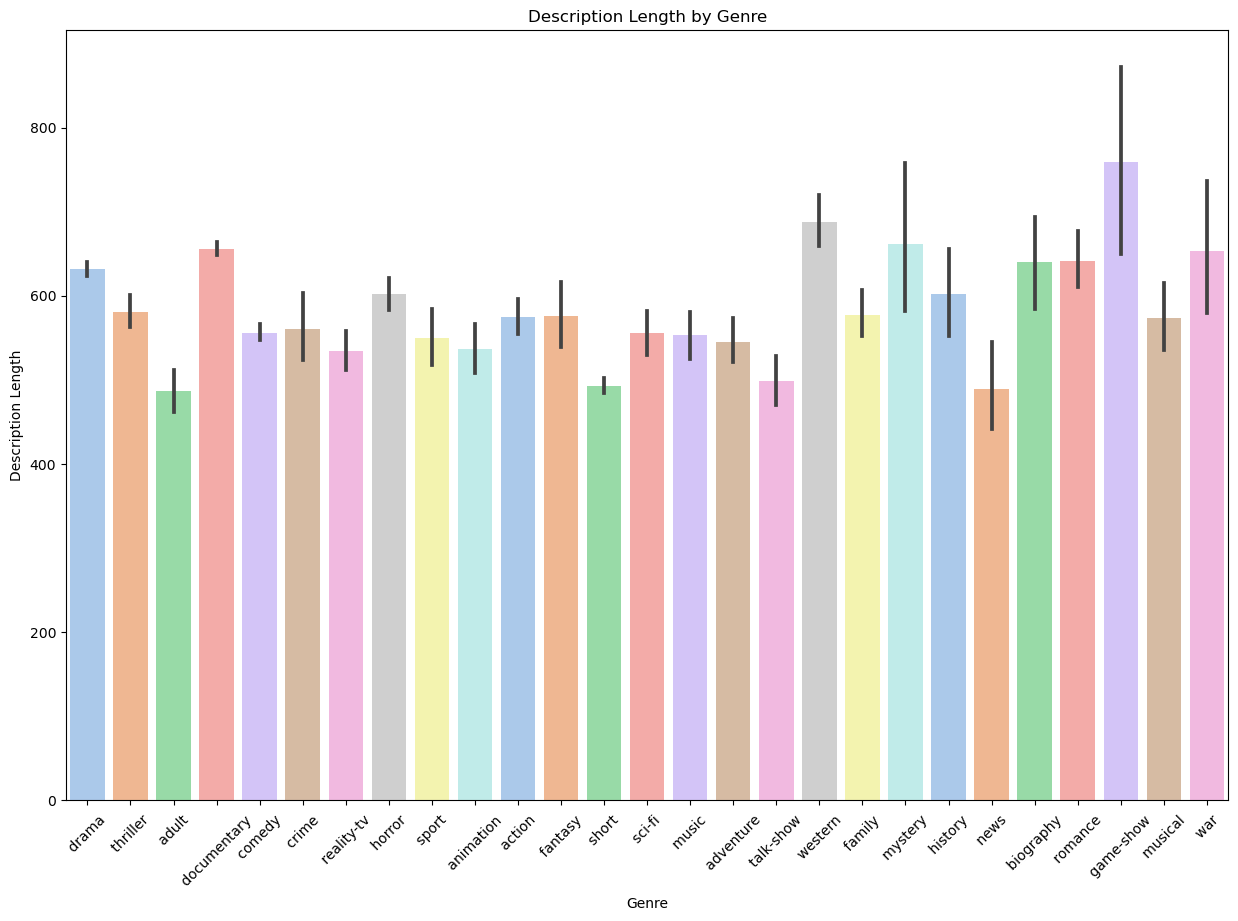

In [8]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data, palette='pastel')
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

In [17]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [18]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [19]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [21]:
Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [22]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [23]:
lr_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [25]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "Nightclub singer Alice Carroll is found in the office of club owner Al Barrow, who is lying dead on the floor. Alice has been overheard threatening to kill Barrow rather than give in to his advances. She protests her innocence, but the District Attorney doesn't believe her and charges her with Barrow's murder. However, things aren't quite as cut-and-dried as the D.A. believes them to be."
print(predict_movie(sample_descr_for_movie))

 drama 
